#Coding Assignment: Data Curation And Analysis

Step 1: Importing the necessary libraries for the project which are pandas, requests, BeautifulSoup, and matplotlib.

In [31]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

Step 2: Extracting the data from the wikipedia page "COVID-19 pandemic cases in January 2021" using requests to make the HTTP request, BeautifulSoup for parsing the data fron the html, and pandas to create a dataframe from the table data. There are two tables on the given page so this is for the first table which includes the coronavirus cases in countries from dates January 1 to January 15.

In [36]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/COVID-19_pandemic_cases_in_January_2021"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# parse data from the html into a beautifulsoup object
bs = BeautifulSoup(response.text, 'html.parser')
table_details=bs.find('table',{'class':"wikitable"})
raw_df1=pd.read_html(str(table_details))
# convert list to dataframe
raw_df1=pd.DataFrame(raw_df1[0])
raw_df1

,Date,Jan 1,Jan 2,Jan 3,Jan 4,Jan 5,Jan 6,Jan 7,Jan 8,Jan 9,Jan 10,Jan 11,Jan 12,Jan 13,Jan 14,Jan 15
0,World,81963694,82594195,83340305,83934188,84476587,85212862,85980229,86789489,87589201,88460015,89140923,89707109,90386161,91107572,91818790
1,Days to double,74,74,74,75,75,75,75,75,76,76,76,77,77,77,78
2,Countries and territories,222,222,222,222,222,222,222,222,222,223,223,223,223,223,223
3,USA,19346790,19578217,19974413,20258725,20470169,20643544,20870913,21170475,21447670,21761186,22009275,22229803,22428591,22645757,22871330
4,India,10286709,10305788,10323965,10340469,10356844,10374932,10395278,10413417,10413417,10450284,10466595,10479179,10495147,10512093,10527683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saba,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
222,Wallis and Futuna,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
223,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
224,Vanuatu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Step 3: Saving the raw data as a JSON file

In [55]:
raw_df1.to_json("Raw_Data_1")

Step 4: Cleaning the dataset by dropping the rows "Days to double" and "Countries and Territories" because they are not going to be useful for my analysis. Also resetting the index, so that it is in a correct order.

In [37]:
final_df1= raw_df1
final_df1= final_df1.drop([1, 2])
final_df1.reset_index(drop=True, inplace=True)
final_df1

,Date,Jan 1,Jan 2,Jan 3,Jan 4,Jan 5,Jan 6,Jan 7,Jan 8,Jan 9,Jan 10,Jan 11,Jan 12,Jan 13,Jan 14,Jan 15
0,World,81963694,82594195,83340305,83934188,84476587,85212862,85980229,86789489,87589201,88460015,89140923,89707109,90386161,91107572,91818790
1,USA,19346790,19578217,19974413,20258725,20470169,20643544,20870913,21170475,21447670,21761186,22009275,22229803,22428591,22645757,22871330
2,India,10286709,10305788,10323965,10340469,10356844,10374932,10395278,10413417,10413417,10450284,10466595,10479179,10495147,10512093,10527683
3,Brazil,7619200,7675973,7700578,7716405,7733746,7753752,7810400,7873830,7961673,8013708,8075998,8105790,8131612,8195637,8256536
4,Russia,3186336,3212637,3236787,3260138,3284384,3308601,3332142,3355794,3379103,3401954,3425269,3448203,3471053,3495816,3520531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Saba,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
220,Wallis and Futuna,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
221,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
222,Vanuatu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Step 5: Transposing the dataset by interchanging the rows and columns so the dataset is easier to read and the date column actually contains dates.

In [38]:
final_df1.set_index('Date', inplace=True)
final_df1 = final_df1.T
final_df1


Date,World,USA,India,Brazil,Russia,UK,France,Italy,Spain,Germany,...,Sint Eustatius,Solomon Islands,Saint Pierre and Miquelon,Anguilla,Montserrat,Saba,Wallis and Futuna,Marshall Islands,Vanuatu,Micronesia
Jan 1,81963694,19346790,10286709,7619200,3186336,2488784,2576420,2107166,1893502,1742661,...,19,17,16,13,13,5,4,4,1,0
Jan 2,82594195,19578217,10305788,7675973,3212637,2542069,2595661,2129376,1893502,1755351,...,19,17,16,14,13,5,4,4,1,0
Jan 3,83340305,19974413,10323965,7700578,3236787,2599793,2599127,2141201,1893502,1765666,...,19,17,16,15,13,5,4,4,1,0
Jan 4,83934188,20258725,10340469,7716405,3260138,2654783,2611616,2155446,1893502,1775513,...,19,17,16,15,13,5,4,4,1,0
Jan 5,84476587,20470169,10356844,7733746,3284384,2713567,2615185,2166244,1893502,1787410,...,19,17,16,15,13,5,4,4,1,0
Jan 6,85212862,20643544,10374932,7753752,3308601,2774483,2635551,2181619,1999362,1808647,...,19,17,16,15,13,5,4,4,1,0
Jan 7,85980229,20870913,10395278,7810400,3332142,2836805,2660740,2201945,2019090,1835038,...,19,17,16,15,13,5,4,4,1,0
Jan 8,86789489,21170475,10413417,7873830,3355794,2889423,2682250,2220361,2025560,1866887,...,19,17,16,15,13,5,4,4,1,0
Jan 9,87589201,21447670,10413417,7961673,3379103,2957476,2701658,2237890,2025560,1891581,...,19,17,16,15,13,5,4,4,1,0
Jan 10,88460015,21761186,10450284,8013708,3401954,3017413,2721692,2257866,2094941,1908527,...,19,17,16,15,13,5,4,4,1,1


Step 6: Obtaining the data for the second table in the wikipedia page in the same way, and using the caption "Coronavirus (SARS-CoV-2) cases in second half of January 2021" to find it.

In [33]:
wikiurl="https://en.wikipedia.org/wiki/COVID-19_pandemic_cases_in_January_2021"
table_class = "wikitable sortable jquery-tablesorter"
response = requests.get(wikiurl)

bs = BeautifulSoup(response.text, 'html.parser')
tables = bs.find_all('table', {'class': "wikitable"})

for table in tables:
    if "Coronavirus (SARS-CoV-2) cases in second half of January 2021" in str(table):
        second_table = table
        break
raw_df2 = pd.read_html(str(second_table))[0]
raw_df2 = pd.DataFrame(raw_df2)
raw_df2

,Date,Jan 16,Jan 17,Jan 18,Jan 19,Jan 20,Jan 21,Jan 22,Jan 23,Jan 24,Jan 25,Jan 26,Jan 27,Jan 28,Jan 29,Jan 30,Jan 31
0,World,92506805,93219698,93812404,94124606,95847815,96483572,97146939,97795819,98417863,98953537,99363689,99907059,100485311,101068347,101581407,102083337
1,Days to double,74,74,74,75,75,75,75,76,76,77,78,78,79,79,79,80
2,Countries and territories,223,223,223,223,224,224,224,224,224,224,224,223,223,223,223,223
3,USA,23097938,23344423,23556676,23556676,23884299,24037236,24225155,24413331,24604325,24775208,24916899,25050308,25198841,25354044,25512197,25676612
4,India,10542841,10557985,10571773,10581837,10595660,10610883,10625428,10639684,10654533,10667736,10676838,10689527,10701193,10720048,10733131,10746183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saba,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6
222,Wallis and Futuna,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5
223,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
224,Samoa,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2


Step 7: Saving the raw data as a JSON file again.

In [56]:
raw_df2.to_json("Raw_Data_2")

Step 8: Cleaning the second dataframe which includes the coronavirus cases in countries from dates January 16 to January 31 in the same way as the first dataframe.

In [34]:
final_df2= raw_df2
final_df2= final_df2.drop([1, 2])
final_df2.reset_index(drop=True, inplace=True)
final_df2

,Date,Jan 16,Jan 17,Jan 18,Jan 19,Jan 20,Jan 21,Jan 22,Jan 23,Jan 24,Jan 25,Jan 26,Jan 27,Jan 28,Jan 29,Jan 30,Jan 31
0,World,92506805,93219698,93812404,94124606,95847815,96483572,97146939,97795819,98417863,98953537,99363689,99907059,100485311,101068347,101581407,102083337
1,USA,23097938,23344423,23556676,23556676,23884299,24037236,24225155,24413331,24604325,24775208,24916899,25050308,25198841,25354044,25512197,25676612
2,India,10542841,10557985,10571773,10581837,10595660,10610883,10625428,10639684,10654533,10667736,10676838,10689527,10701193,10720048,10733131,10746183
3,Brazil,8324294,8393492,8455059,8488099,8511770,8573864,8638249,8697368,8753920,8816254,8844577,8871393,8933356,8996876,9058687,9118513
4,Russia,3544623,3568209,3591066,3612800,3633952,3655839,3677352,3698273,3719400,3738690,3756931,3774672,3793810,3813048,3832080,3850439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Saba,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6
220,Wallis and Futuna,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5
221,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
222,Samoa,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2


Step 9: Transposing the second dataset in the same way.

In [35]:
final_df2.set_index('Date', inplace=True)
final_df2 = final_df2.T
final_df2

Date,World,USA,India,Brazil,Russia,UK,France,Spain,Italy,Turkey,...,Saint Pierre and Miquelon,Sint Eustatius,Anguilla,Solomon Islands,Montserrat,Saba,Wallis and Futuna,Marshall Islands,Samoa,Vanuatu
Jan 16,92506805,23097938,10542841,8324294,3544623,3316023,2825764,2211967,2352423,1558777,...,16,19,15,17,13,5,4,4,0,1
Jan 17,93219698,23344423,10557985,8393492,3568209,3357365,2846971,2211967,2368733,1566327,...,16,19,15,17,13,5,4,4,0,1
Jan 18,93812404,23556676,10571773,8455059,3591066,3395963,2863613,2211967,2381277,1572763,...,16,19,15,17,13,5,4,4,0,1
Jan 19,94124606,23556676,10581837,8488099,3612800,3433498,2866665,2211967,2390102,1578625,...,16,20,15,17,13,5,4,4,0,1
Jan 20,95847815,23884299,10595660,8511770,3633952,3466853,2890012,2423001,2400598,2399781,...,16,20,15,17,13,5,4,4,2,1
Jan 21,96483572,24037236,10610883,8573864,3655839,3505758,2916577,2461832,2414166,2406216,...,16,20,15,17,13,6,4,4,2,1
Jan 22,97146939,24225155,10625428,8638249,3677352,3543650,2939128,2499326,2428221,2412505,...,16,20,15,17,13,6,4,4,2,1
Jan 23,97795819,24413331,10639684,8697368,3698273,3583911,2961737,2534055,2441854,2418472,...,16,20,15,17,13,6,4,4,2,1
Jan 24,98417863,24604325,10654533,8753920,3719400,3617463,2985259,2567919,2455185,2424328,...,20,20,15,17,13,6,4,4,2,1
Jan 25,98953537,24775208,10667736,8816254,3738690,3647467,3003694,2584926,2466813,2429605,...,21,20,15,17,13,6,5,4,2,1


Step 10: Merging both the datasets into one final dataset using pandas.

In [52]:
merged_df = pd.concat([final_df1, final_df2])
merged_df


Date,World,USA,India,Brazil,Russia,UK,France,Italy,Spain,Germany,...,Solomon Islands,Saint Pierre and Miquelon,Anguilla,Montserrat,Saba,Wallis and Futuna,Marshall Islands,Vanuatu,Micronesia,Samoa
Jan 1,81963694,19346790,10286709,7619200,3186336,2488784,2576420,2107166,1893502,1742661,...,17,16,13,13,5,4,4,1,0.0,NaN
Jan 2,82594195,19578217,10305788,7675973,3212637,2542069,2595661,2129376,1893502,1755351,...,17,16,14,13,5,4,4,1,0.0,NaN
Jan 3,83340305,19974413,10323965,7700578,3236787,2599793,2599127,2141201,1893502,1765666,...,17,16,15,13,5,4,4,1,0.0,NaN
Jan 4,83934188,20258725,10340469,7716405,3260138,2654783,2611616,2155446,1893502,1775513,...,17,16,15,13,5,4,4,1,0.0,NaN
Jan 5,84476587,20470169,10356844,7733746,3284384,2713567,2615185,2166244,1893502,1787410,...,17,16,15,13,5,4,4,1,0.0,NaN
Jan 6,85212862,20643544,10374932,7753752,3308601,2774483,2635551,2181619,1999362,1808647,...,17,16,15,13,5,4,4,1,0.0,NaN
Jan 7,85980229,20870913,10395278,7810400,3332142,2836805,2660740,2201945,2019090,1835038,...,17,16,15,13,5,4,4,1,0.0,NaN
Jan 8,86789489,21170475,10413417,7873830,3355794,2889423,2682250,2220361,2025560,1866887,...,17,16,15,13,5,4,4,1,0.0,NaN
Jan 9,87589201,21447670,10413417,7961673,3379103,2957476,2701658,2237890,2025560,1891581,...,17,16,15,13,5,4,4,1,0.0,NaN
Jan 10,88460015,21761186,10450284,8013708,3401954,3017413,2721692,2257866,2094941,1908527,...,17,16,15,13,5,4,4,1,1.0,NaN


Step 11: Saving the final dataframe into a csv file titled "Coronavirus_Cases_in_January_2021"

In [53]:
merged_df.to_csv("Coronavirus_Cases_in_January_2021.csv")

Step 12: Showing the descriptive statistics on the worldwide data.

In [54]:
merged_df["World"].describe()

count    3.100000e+01
mean     9.242902e+07
std      6.316584e+06
min      8.196369e+07
25%      8.718934e+07
50%      9.250680e+07
75%      9.810684e+07
max      1.020833e+08
Name: World, dtype: float64

Step 13: Making a time series plot of worldwide coronavirus cases using matplotlib and labelling it.

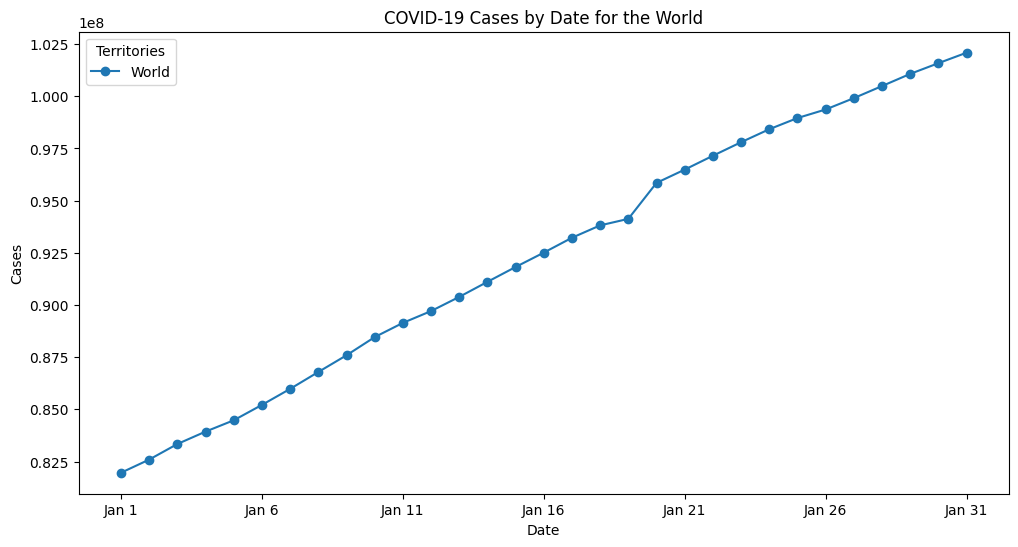

In [41]:
territories_to_plot = ['World']

merged_df[territories_to_plot].plot(kind='line', marker='o', figsize=(12, 6))
plt.title('COVID-19 Cases by Date for the World')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(title='Territories')
plt.show()

Step 14: Making a time series plot of coronavirus cases in the countries with the most cases.

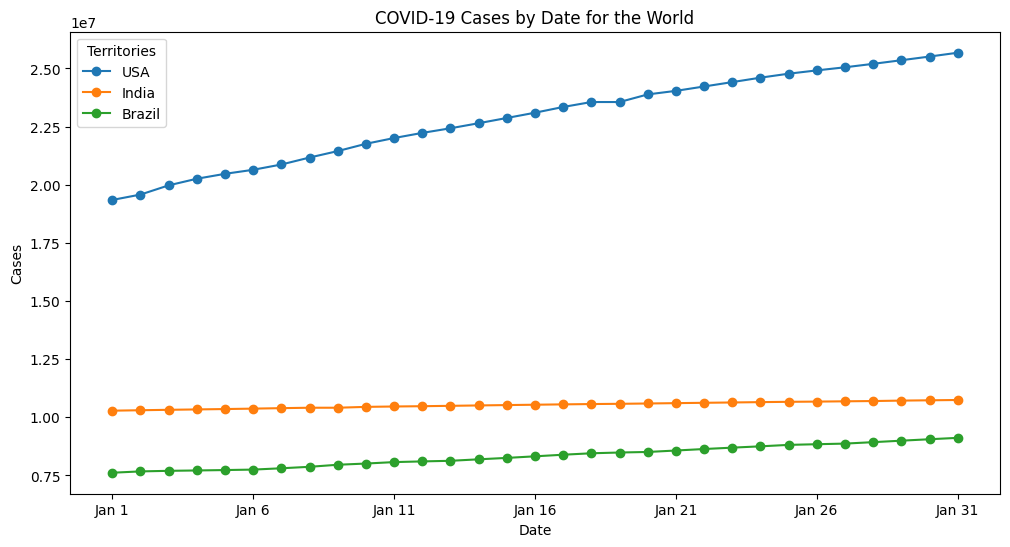

In [44]:
territories_to_plot_2 = ['USA',	'India', 'Brazil']

merged_df[territories_to_plot_2].plot(kind='line', marker='o', figsize=(12, 6))
plt.title('COVID-19 Cases by Date for countries with the highest cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(title='Territories')
plt.show()


Insights: In the first graph, we can clearly see the almost linear increasing trend in the number of coronavirus cases worldiwde in the month of January. In the second graph we can see how India and Brazil have a constant number of coronavirus cases in January 2021 whereas the USA has an increasing trend.